In [ ]:
# Önce kagglehub'ı yükle
!pip install kagglehub


In [ ]:
import kagglehub
import zipfile # Although not used for extraction, it's good practice to keep imports used in the previous version if there's a chance they might be needed later.
import os

# Veri setini indir (son sürümü indiriyor)
# Bu fonksiyon veriyi bir zip dosyası yerine doğrudan bir klasöre indirebilir.
path = kagglehub.dataset_download("anirudhcv/labeled-optical-coherence-tomography-oct")

print("Path to dataset files:", path)

# path zaten bir klasör olduğu için zip dosyasını açmaya gerek yok.
# Zipfile ile açma kısmını kaldırıyoruz.
# with zipfile.ZipFile(path, 'r') as zip_ref:
#     zip_ref.extractall("OCT2017")

# Dosyaların indirildiği klasörü kontrol edelim
print("Downloaded files in:", os.listdir(path))

# Veri setinin ana klasör yolu artık 'path' değişkeninde saklanıyor.
data_dir = path

#

Path to dataset files: /kaggle/input/labeled-optical-coherence-tomography-oct
Downloaded files in: ['Dataset - train+val+test']


In [ ]:
data_dir = "OCT2017"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")


In [ ]:
from torchvision import transforms

image_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
!ls -l


total 4
drwxr-xr-x 1 root root 4096 May 14 13:38 sample_data


In [ ]:
data_dir = "/kaggle/input/labeled-optical-coherence-tomography-oct"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")


In [ ]:
import os

data_dir = "/kaggle/input/labeled-optical-coherence-tomography-oct"
print("Ana veri klasör içeriği:", os.listdir(data_dir))  # Dataset - train+val+test

train_dir = os.path.join(data_dir, "Dataset - train+val+test", "train")
val_dir = os.path.join(data_dir, "Dataset - train+val+test", "val")
test_dir = os.path.join(data_dir, "Dataset - train+val+test", "test")

print("Train klasör içeriği:", os.listdir(train_dir))
print("Val klasör içeriği:", os.listdir(val_dir))
print("Test klasör içeriği:", os.listdir(test_dir))


Ana veri klasör içeriği: ['Dataset - train+val+test']
Train klasör içeriği: ['DRUSEN', 'CNV', 'NORMAL', 'DME']
Val klasör içeriği: ['DRUSEN', 'CNV', 'NORMAL', 'DME']
Test klasör içeriği: ['DRUSEN', 'CNV', 'NORMAL', 'DME']


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

image_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

train_dataset = datasets.ImageFolder(train_dir, transform=image_transforms['train'])
val_dataset = datasets.ImageFolder(val_dir, transform=image_transforms['val'])
test_dataset = datasets.ImageFolder(test_dir, transform=image_transforms['test'])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

print(f"Train set sınıf sayısı: {len(train_dataset.classes)}")
print(f"Val set örnek sayısı: {len(val_dataset)}")
print(f"Test set örnek sayısı: {len(test_dataset)}")


Train set sınıf sayısı: 4
Val set örnek sayısı: 21861
Test set örnek sayısı: 10933


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.optim import lr_scheduler
import time
import copy


In [ ]:
# pretrained=True: ImageNet ile önceden eğitilmiş ağırlıkları alır
model = models.googlenet(pretrained=True)

# Sınıf sayısına göre çıkış katmanını değiştiriyoruz
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)  # 4 sınıf olduğunu varsayıyoruz

# Modeli taşımadan önce device değişkenini tanımla
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 184MB/s]


Using device: cuda:0


In [ ]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Her 7 epoch'ta learning rate'i 0.1x azalt
lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)


In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'\nEpoch {epoch + 1}/{num_epochs}')
        print('-' * 30)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                data_loader = train_loader
            else:
                model.eval()
                data_loader = val_loader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in data_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(data_loader.dataset)
            epoch_acc = running_corrects.double() / len(data_loader.dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # En iyi modeli kaydet
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print(f'\nEğitim tamamlandı. Süre: {time_elapsed//60:.0f}m {time_elapsed%60:.0f}s')
    print(f'En iyi val Acc: {best_acc:.4f}')

    model.load_state_dict(best_model_wts)
    return model


In [ ]:
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    print("-" * 30)

    model.train()
    running_loss = 0.0
    running_corrects = 0

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        if batch_idx % 10 == 0:
            print(f"Batch {batch_idx}/{len(train_loader)} - Loss: {loss.item():.4f}")

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)

    print(f"Epoch {epoch+1} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}\n")


NameError: name 'num_epochs' is not defined

In [ ]:
# Remove the code in ipython-input-15-bde717c22040

# Add a new cell after ipython-input-13-bde717c22040 to call the function:

# Define the number of training epochs
num_epochs = 10 # İstediğiniz epoch sayısını buraya yazın

# train_model fonksiyonunu çağırın
model = train_model(model, criterion, optimizer, lr_scheduler, num_epochs=num_epochs)

# Eğitim tamamlandıktan sonra model, en iyi doğruluklu ağırlıklara sahip olacaktır.


Epoch 1/10
------------------------------


KeyboardInterrupt: 

In [ ]:
# ipython-input-15-bde717c22040 hücresinde, döngüden önce şu satırı ekleyin:
num_epochs = 10 # Epoch sayısını burada tanımlayın

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    print("-" * 30)

    model.train()
    running_loss = 0.0
    running_corrects = 0

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        if batch_idx % 10 == 0:
            print(f"Batch {batch_idx}/{len(train_loader)} - Loss: {loss.item():.4f}")

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)

    print(f"Epoch {epoch+1} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}\n")

Epoch 1/10
------------------------------
Batch 0/2392 - Loss: 0.1054
Batch 10/2392 - Loss: 0.0753
Batch 20/2392 - Loss: 0.1391
Batch 30/2392 - Loss: 0.1334
Batch 40/2392 - Loss: 0.0779
Batch 50/2392 - Loss: 0.0332
Batch 60/2392 - Loss: 0.0560
Batch 70/2392 - Loss: 0.0572
Batch 80/2392 - Loss: 0.1026
Batch 90/2392 - Loss: 0.0787
Batch 100/2392 - Loss: 0.2401
Batch 110/2392 - Loss: 0.3829
Batch 120/2392 - Loss: 0.1923
Batch 130/2392 - Loss: 0.0772
Batch 140/2392 - Loss: 0.2572
Batch 150/2392 - Loss: 0.3659
Batch 160/2392 - Loss: 0.1186
Batch 170/2392 - Loss: 0.3533
Batch 180/2392 - Loss: 0.1513
Batch 190/2392 - Loss: 0.1531
Batch 200/2392 - Loss: 0.2098
Batch 210/2392 - Loss: 0.1036
Batch 220/2392 - Loss: 0.3988
Batch 230/2392 - Loss: 0.1160
Batch 240/2392 - Loss: 0.2285
Batch 250/2392 - Loss: 0.1739
Batch 260/2392 - Loss: 0.0751
Batch 270/2392 - Loss: 0.1498
Batch 280/2392 - Loss: 0.1650
Batch 290/2392 - Loss: 0.2309
Batch 300/2392 - Loss: 0.1285
Batch 310/2392 - Loss: 0.1352
Batch 320

In [ ]:
def evaluate(model, dataloader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()

    print(f'Test Doğruluk: {100 * correct / total:.2f}%')

evaluate(model, test_loader)


Test Doğruluk: 97.56%


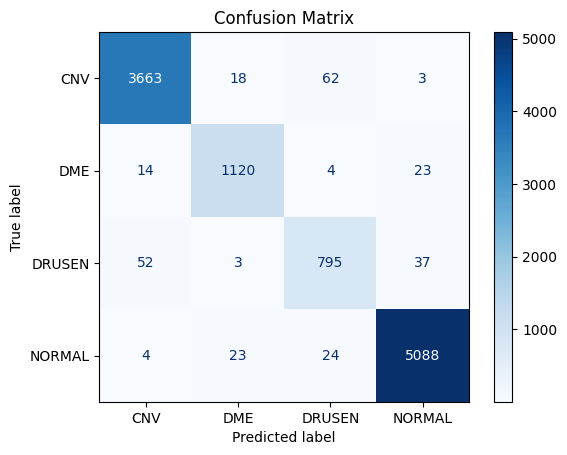

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(model, dataloader, class_names):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# Sınıf isimlerini ver (örnek: ['CNV', 'DME', 'DRUSEN', 'NORMAL'])
class_names = ['CNV', 'DME', 'DRUSEN', 'NORMAL']
plot_confusion_matrix(model, test_loader, class_names)


In [ ]:
# Modeli kaydet
torch.save(model.state_dict(), 'googlenet_oct_model.pth')
print("Model başarıyla kaydedildi: googlenet_oct_model.pth")


Model başarıyla kaydedildi: googlenet_oct_model.pth


In [ ]:
model.load_state_dict(torch.load('googlenet_oct_model.pth'))
model.eval()


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

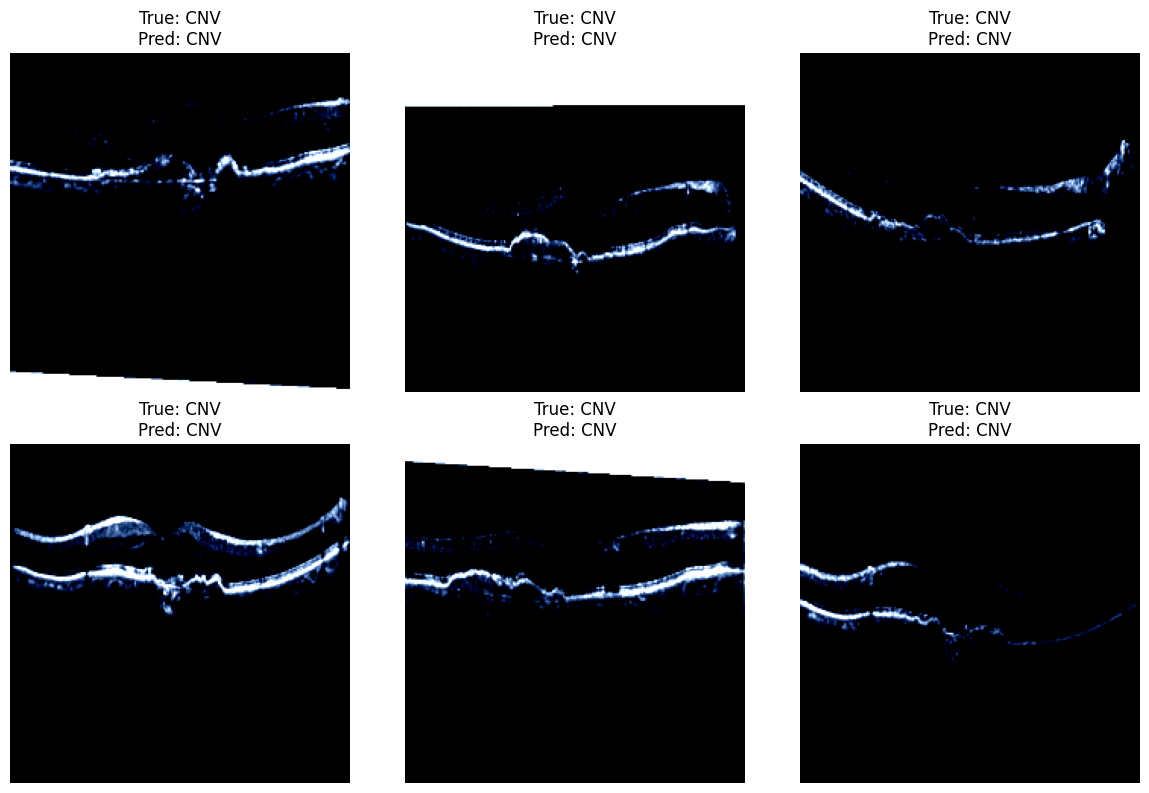

In [ ]:
import matplotlib.pyplot as plt

def visualize_predictions(model, dataloader, class_names, num_images=6):
    model.eval()
    images_so_far = 0
    plt.figure(figsize=(12, 8))

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for i in range(inputs.size(0)):
                if images_so_far == num_images:
                    plt.tight_layout()
                    plt.show()
                    return

                images_so_far += 1
                img = inputs[i].cpu().permute(1, 2, 0).numpy()
                plt.subplot(2, 3, images_so_far)
                plt.imshow(img)
                plt.title(f'True: {class_names[labels[i]]}\nPred: {class_names[preds[i]]}')
                plt.axis('off')

visualize_predictions(model, test_loader, class_names)


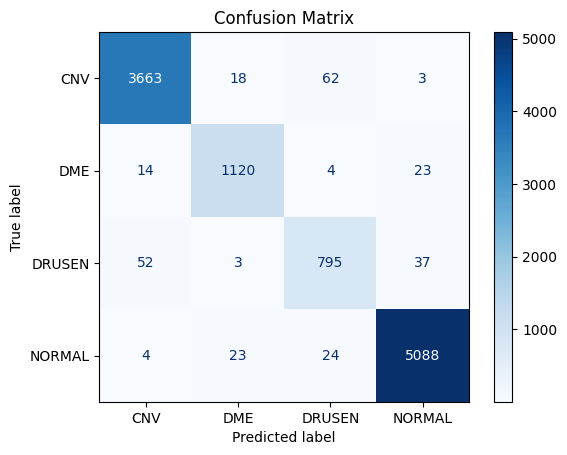

In [ ]:

import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Test verisi üzerinden tahminler
y_true = []
y_pred = []
model.eval()

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Confusion matrix çizimi
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:

# Modeli .pth dosyası olarak kaydet
torch.save(model.state_dict(), "googlenetV1_model.pth")
print("Model başarıyla kaydedildi: googlenetV1_model.pth")


Model başarıyla kaydedildi: googlenetV1_model.pth


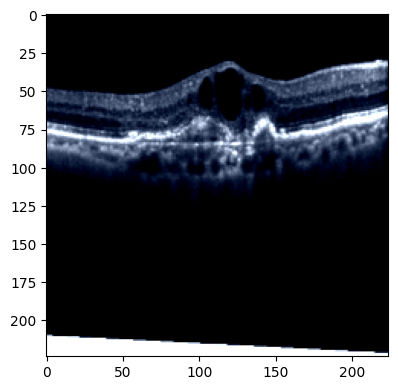

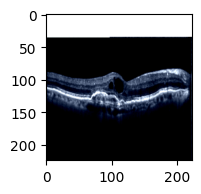

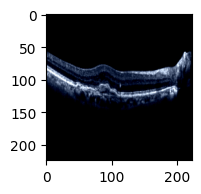

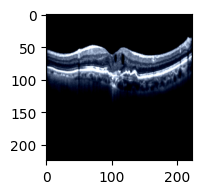

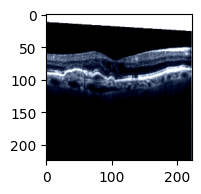

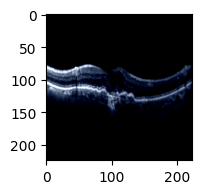

<Figure size 640x480 with 0 Axes>

In [ ]:

import numpy as np

def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title:
        plt.title(title)
    plt.pause(0.001)

# Birkaç test görseli ve tahmini
model.eval()
inputs, classes = next(iter(test_loader))
inputs = inputs.to(device)

with torch.no_grad():
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)

# Görselleri göster
plt.figure(figsize=(15, 10))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    imshow(inputs.cpu().data[i])
    ax.set_title(f"Gerçek: {class_names[classes[i]]} / Tahmin: {class_names[preds[i]]}")
    ax.axis("off")
plt.tight_layout()
plt.show()
